# CompBio Problem set 3

## Problem 1


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('science')
from tqdm import trange

SIS - MODEL

$\frac{dI}{dt} = \frac{\alpha}{S+I} * S * I - \beta * I$  
$\frac{dS}{dt} = - \frac{\alpha}{S+I} * S * I + \beta * I$


In [5]:
# Parameters

## infection
bn_values = [0.1,1,10]

## recovery
dn_values = [0.2,2,5]

## parameter combinations
parameters = [[bn_values[0], dn_values[0]], [bn_values[1], dn_values[1]], [bn_values[2], dn_values[2]]] 

# Simumation parameters
dt = 0.01
tEnd = 1000
steps = int(tEnd/dt)
timeVector = np.linspace(0, tEnd, steps)

In [6]:
def timeOfInterest(value):
    timeOfInterest = dt
    while True:
        if np.random.random() < value:
            return timeOfInterest
        timeOfInterest += dt

In [7]:
# store for each parameter combination the time t_b and t_d
t_b_values = []
t_d_values = []

for i in trange(3):
    b_param = parameters[i][0]
    d_param = parameters[i][1]
    t_b = []
    t_d = []
    for j in range(steps):
        prob_TB = b_param*dt
        prob_TD = d_param*dt
        # n increase
        timeOfInterest_TB = timeOfInterest(prob_TB)
        # n decrease
        timeOfInterest_TD = timeOfInterest(prob_TD)
        t_b.append(timeOfInterest_TB)
        t_d.append(timeOfInterest_TD)

    t_b_values.append(t_b)
    t_d_values.append(t_d)

100%|██████████| 3/3 [00:27<00:00,  9.32s/it]


In [24]:
# sort the arrays and normalize them to have the probability
t_b_values = np.array(t_b_values)
t_d_values = np.array(t_d_values)

# convert to numpy array
t_b_values = np.array(t_b_values)
t_d_values = np.array(t_d_values)
bn_values = np.array(bn_values)
dn_values = np.array(dn_values)

# compute the Infection and recovery events
bn_values_expanded = bn_values[:, np.newaxis]
dn_values_expanded = dn_values[:, np.newaxis]

# Perform element-wise exponentiation
InfectionEvent = np.exp(-bn_values_expanded * t_b_values)
RecoveryEvent = np.exp(-(dn_values_expanded)*t_d_values)

# 
TB_probability = []
TB_probability_sum = []
TD_probability = []
TD_probability_sum = []

for i in range(3):
    # compute the probability of infection and recovery (t_b_values and t_d_values)
    sumTD_values = np.sum(t_b_values[i])
    sumTB_values = np.sum(t_d_values[i])
    TB_probability_sum.append(sumTB_values)
    TD_probability_sum.append(sumTD_values)

    counts_t_b = np.unique(t_b_values[i], return_counts=True)
    counts_t_d = np.unique(t_d_values[i], return_counts=True)
    # now sort the tuples by their counts descending
    sorted_TB = sorted(list(zip(*counts_t_b)), key=lambda x: x[1], reverse=True)
    sorted_TD = sorted(list(zip(*counts_t_d)), key=lambda x: x[1], reverse=True)

    TB_probability.append(sorted_TB)
    TD_probability.append(sorted_TD)


In [27]:
print(len(TB_probability))
print(len(TB_probability_sum))
print(InfectionEvent.shape)
print(RecoveryEvent.shape)

3
3
(3, 100000)
(3, 100000)


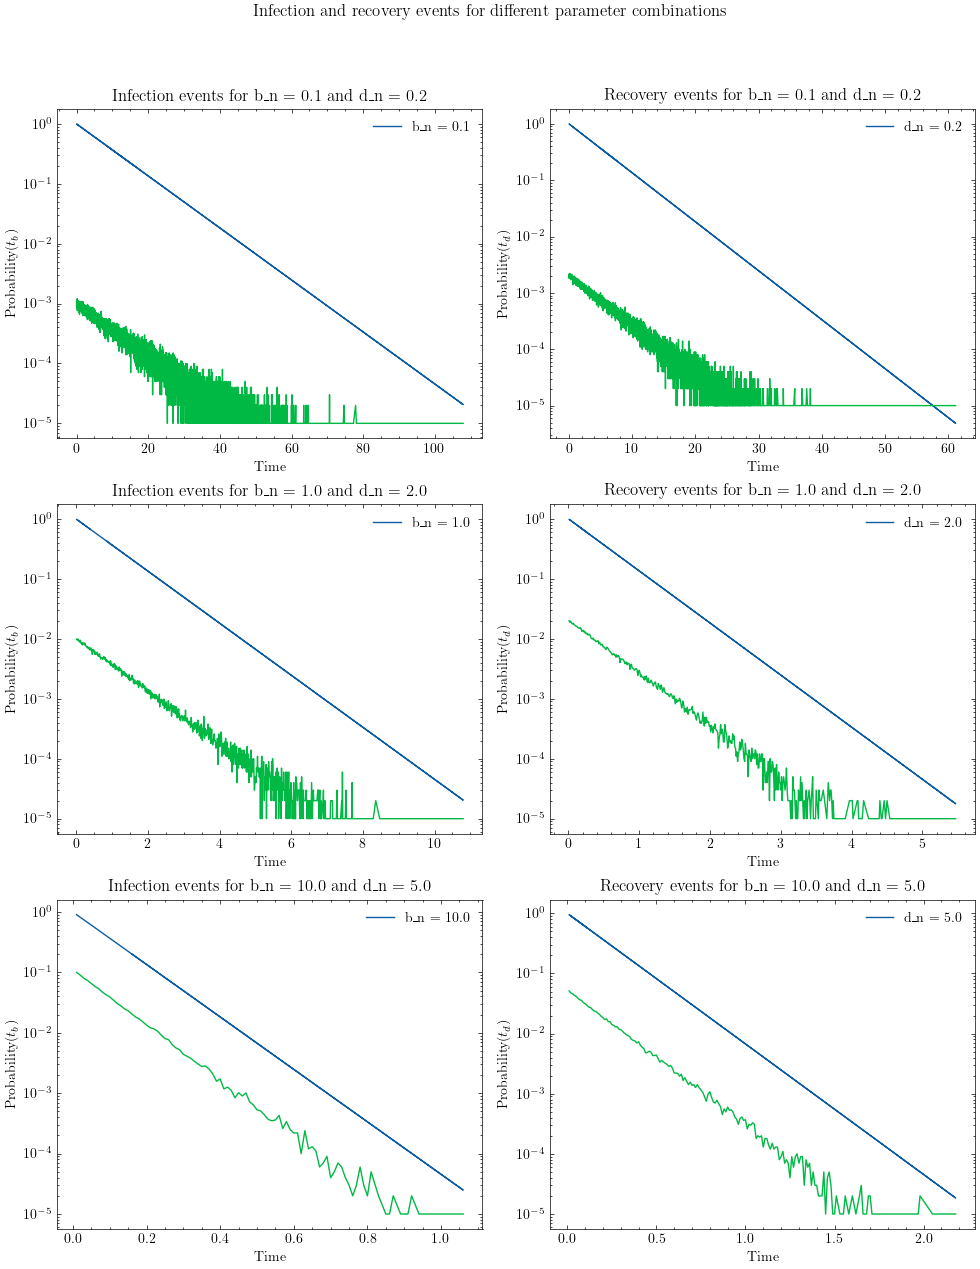

In [47]:
# plot the six subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 13))
fig.suptitle('Infection and recovery events for different parameter combinations')
for i in range(3):
        
    distribution_t_b = np.array(np.unique(t_b_values[i], return_counts=True)).T
    distribution_t_b[:, 1] /= np.sum(distribution_t_b[:, 1]) 

    distribution_t_d = np.array(np.unique(t_d_values[i], return_counts=True)).T
    distribution_t_d[:, 1] /= np.sum(distribution_t_d[:, 1]) 
    axs[i, 0].semilogy(t_b_values[i],  InfectionEvent[i]  ,label='b_n = ' + str(bn_values[i]))
    axs[i, 0].semilogy(distribution_t_b[:,0], (distribution_t_b[:,1]))
    axs[i, 0].set_title('Infection events for b_n = ' + str(bn_values[i]) + ' and d_n = ' + str(dn_values[i]))
    axs[i, 0].set_xlabel('Time')
    axs[i, 0].set_ylabel('Probability($t_b$)')
    axs[i, 0].legend()

    axs[i, 1].semilogy(t_d_values[i],  RecoveryEvent[i] ,label='d_n = ' + str(dn_values[i]))
    axs[i, 1].semilogy(distribution_t_d[:,0], (distribution_t_d[:,1]))
    axs[i, 1].set_title('Recovery events for b_n = ' + str(bn_values[i]) + ' and d_n = ' + str(dn_values[i]))
    axs[i, 1].set_xlabel('Time')
    axs[i, 1].set_ylabel('Probability($t_d$)')
    axs[i, 1].legend()

plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.savefig('infection_recovery_events.png')
plt.show()




In [50]:
# find average time of infection and recovery
for i in range(3):
    print(f"mean time recovery(tb): \t{np.round(np.mean(np.array(t_b_values[i])), 2)} s")
    print(f"mean time infection(td): \t{np.round(np.mean(np.array(t_d_values[i])), 2)} s")



mean time recovery(tb): 	10.0 s
mean time infection(td): 	4.98 s
mean time recovery(tb): 	1.0 s
mean time infection(td): 	0.5 s
mean time recovery(tb): 	0.1 s
mean time infection(td): 	0.2 s


D) Population distribution at different times in the stochastic model
